In [ ]:
#导入

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # 画图模块
import scipy.stats as stats #统计函数库
from datetime import datetime # 导入时间模块
from IPython.core.interactiveshell import InteractiveShell #设置显示结果
import statsmodels.formula.api as smf  # OLS regression

#输出矢量图 渲染矢量图
%matplotlib notebook 
%config InlineBackend.figure_format = 'svg'

#选择一个绘图主题 适应黑色的Jupyter Theme
#只能在jupyter里用
#from jupyterthemes import jtplot

#jtplot.style(theme='onedork')

#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [ ]:
#price‐dividend ratio

In [12]:
pd2 = pd.read_table('reg2.csv',sep=',')
pd2['time'] = pd.to_datetime(pd2['time'], format = '%Y-%m-%d')
pd2.set_index('time',inplace = True)
pd2 = pd2[['pd']]
pd2.loc[:,'year'] = pd2.index.year
pd2.loc[:,'month'] = pd2.index.month 
pd2 = pd2[['year','month','pd']]
pd2

,year,month,pd
time,,,
1995-01-01,1995,1,4.084782
1995-02-01,1995,2,4.081370
1995-03-01,1995,3,4.238190
1995-04-01,1995,4,4.117053
1995-05-01,1995,5,4.137976
...,...,...,...
2021-02-01,2021,2,4.140173
2021-03-01,2021,3,4.117256
2021-04-01,2021,4,4.114410


In [ ]:
#price‐earnings ratio

In [13]:
pe = pd.read_table('reg2.csv',sep=',')
pe['time'] = pd.to_datetime(pe['time'], format = '%Y-%m-%d')
pe.set_index('time',inplace = True)
pe = pe[['pe']]
pe.loc[:,'year'] = pe.index.year
pe.loc[:,'month'] = pe.index.month 
pe = pe[['year','month','pe']]
pe

,year,month,pe
time,,,
1995-01-01,1995,1,2.763315
1995-02-01,1995,2,2.741896
1995-03-01,1995,3,2.844483
1995-04-01,1995,4,2.618815
1995-05-01,1995,5,2.762227
...,...,...,...
2021-02-01,2021,2,2.922587
2021-03-01,2021,3,2.873956
2021-04-01,2021,4,2.787560


In [ ]:
#price‐book value ratio

In [14]:
pb = pd.read_table('reg2.csv',sep=',')
pb['time'] = pd.to_datetime(pb['time'], format = '%Y-%m-%d')
pb.set_index('time',inplace = True)
pb = pb[['pb']]
pb.loc[:,'year'] = pb.index.year
pb.loc[:,'month'] = pb.index.month 
pb = pb[['year','month','pb']]
pb

,year,month,pb
time,,,
1995-01-01,1995,1,0.821406
1995-02-01,1995,2,0.801429
1995-03-01,1995,3,0.912102
1995-04-01,1995,4,0.761376
1995-05-01,1995,5,0.772707
...,...,...,...
2021-02-01,2021,2,0.542445
2021-03-01,2021,3,0.519381
2021-04-01,2021,4,0.513151


In [ ]:
#股票市场收益率

In [18]:
# data = pd.read_table("桌面/TRD_Cnmont.csv",sep=",")
data = pd.read_table('C:/Users/lenovo/Desktop/金融市场与金融机构/第三次作业/stock(1)/TRD_Cnmont.csv',sep=',')
# 选取列为21的数据 综合A股和创业板
data = data[data['Markettype'] == 21]
# 列重命名
data = data.rename(columns = {'Cmretwdos': 'Return',
                             'Trdmnt': 'YearMon'})
data['YearMon'] = data['YearMon']+'-01'
data['YearMon'] = pd.to_datetime(data['YearMon'], format = '%Y-%m-%d')
data

,Markettype,YearMon,Cmretwdeq,Cmretmdeq,Return,Cmretmdos,Cmretwdtl,Cmretmdtl,Cmnstkcal,Cmmvosd,Cmmvttl
2,21,1990-12-01,NaN,NaN,NaN,NaN,NaN,NaN,6,6.241660e+05,2.082551e+06
10,21,1991-01-01,0.036554,0.036554,0.029998,0.029998,0.040097,0.040097,10,1.931395e+06,4.570745e+06
18,21,1991-02-01,0.021860,0.021860,0.010203,0.010203,0.006360,0.006360,10,1.819734e+06,4.412147e+06
26,21,1991-03-01,-0.060425,-0.059840,-0.099663,-0.098917,-0.088522,-0.088183,10,1.468212e+06,3.837938e+06
34,21,1991-04-01,-0.031449,-0.031449,-0.079652,-0.079652,-0.050150,-0.050150,11,2.508786e+06,5.763950e+06
...,...,...,...,...,...,...,...,...,...,...,...
3265,21,2021-04-01,0.002728,0.002737,0.014812,0.014819,0.016157,0.016163,4011,6.390267e+10,7.664212e+10
3274,21,2021-05-01,0.061486,0.061447,0.049441,0.049428,0.051133,0.051119,4034,6.745909e+10,8.081850e+10
3283,21,2021-06-01,0.029570,0.029551,0.005010,0.005041,0.007145,0.007170,4067,6.822407e+10,8.148119e+10
3292,21,2021-07-01,-0.004350,-0.004269,-0.041398,-0.041115,-0.042870,-0.042620,4099,6.523007e+10,7.787347e+10


In [19]:
market_return_mon = data[['YearMon','Return']]
market_return_mon.set_index('YearMon', inplace = True)
market_return_mon.loc[:,'year'] = market_return_mon.index.year
market_return_mon.loc[:,'month'] = market_return_mon.index.month
market_return_mon = market_return_mon[['year', 'month', 'Return']]
market_return_mon = market_return_mon.dropna()
market_return_mon

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
D:\anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,year,month,Return
YearMon,,,
1991-01-01,1991,1,0.029998
1991-02-01,1991,2,0.010203
1991-03-01,1991,3,-0.099663
1991-04-01,1991,4,-0.079652
1991-05-01,1991,5,-0.074521
...,...,...,...
2021-04-01,2021,4,0.014812
2021-05-01,2021,5,0.049441
2021-06-01,2021,6,0.005010


<IPython.core.display.Javascript object>


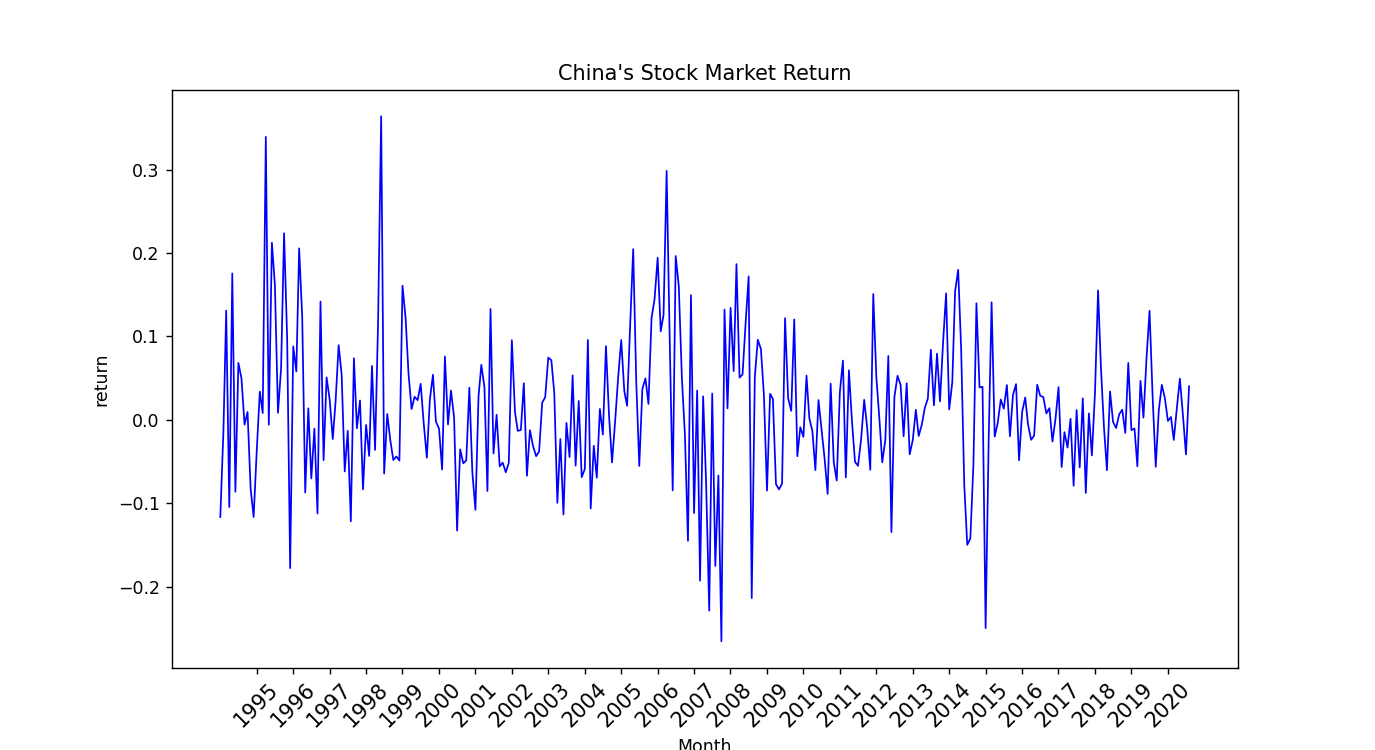

Text(0.5, 1.0, "China's Stock Market Return")

Text(0.5, 0, 'Month')

Text(0, 0.5, 'return')

In [20]:
import matplotlib.pyplot as plt  # 画图模块
plt.rcParams['figure.facecolor'] = 'white' 
fig = plt.figure(figsize=(11, 6))
plt.plot('Return',
         '-b',
         label='Market Return',
         linewidth=1,
         data=market_return_mon[market_return_mon['year'] >= 1995])
plt.title("China's Stock Market Return")
plt.xlabel('Month')
plt.ylabel('return')
year_freq = pd.date_range(start='1995', end='2021', freq='y')
c = plt.xticks(year_freq, year_freq.year, rotation=45, fontsize=12)
fig = plt.gcf()
fig.savefig('1995-2021股票市场收益率.png', bbox_inches='tight')
plt.show()

In [ ]:
#合并股市收益率和pd

In [61]:
# %% Merge Time Series Data
time_series = pd.merge(market_return_mon,pd2,on=['year', 'month'])
time_series = time_series.sort_values(axis=0, ascending=True, by=['year','month'])
time_series['mon'] = pd.date_range('1995-01','2021-06', freq='MS')
time_series['return'] = np.log(time_series['Return']+1)
time_series.set_index('mon', inplace=True)
time_series['lpd'] = time_series['pd'].shift(1)
time_series

,year,month,Return,pd,return,lpd
mon,,,,,,
1995-01-01,1995,1,-0.116298,4.084782,-0.123635,NaN
1995-02-01,1995,2,-0.014059,4.081370,-0.014159,4.084782
1995-03-01,1995,3,0.130882,4.238190,0.122998,4.081370
1995-04-01,1995,4,-0.104304,4.117053,-0.110154,4.238190
1995-05-01,1995,5,0.175455,4.137976,0.161655,4.117053
...,...,...,...,...,...,...
2021-02-01,2021,2,0.003571,4.140173,0.003565,4.129524
2021-03-01,2021,3,-0.024019,4.117256,-0.024312,4.140173
2021-04-01,2021,4,0.014812,4.114410,0.014703,4.117256


<IPython.core.display.Javascript object>


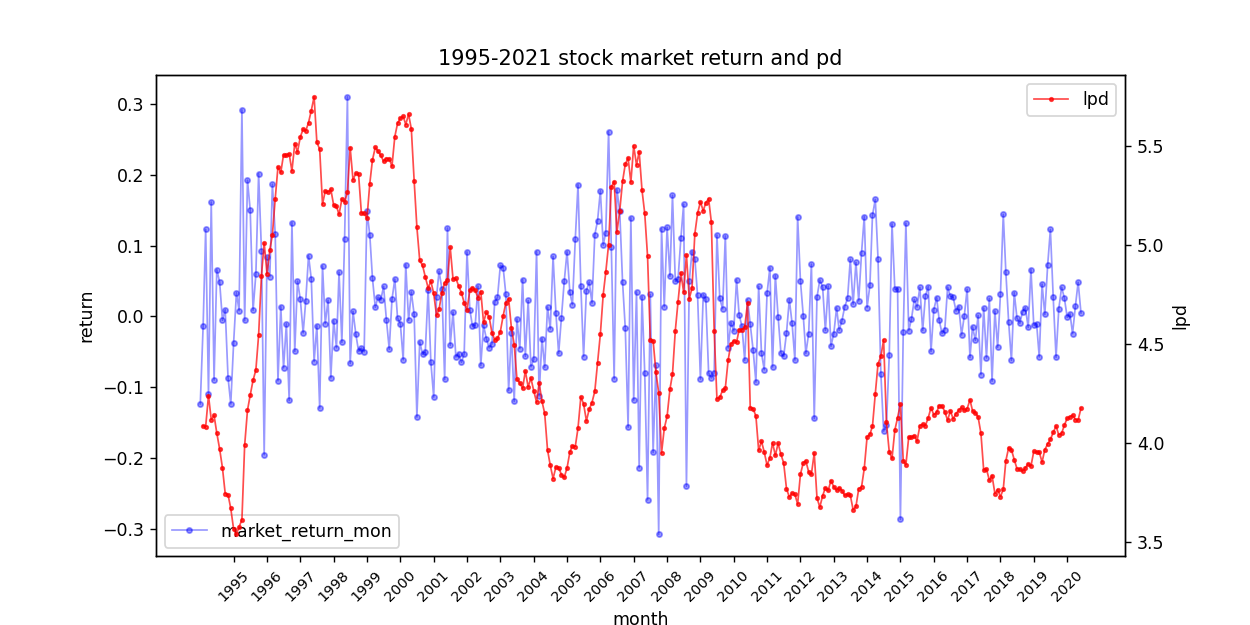

Text(0.5, 0, 'month')

Text(0, 0.5, 'return')

Text(0.5, 1.0, '1995-2021 stock market return and pd')

Text(0, 0.5, 'lpd')

In [62]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(time_series['return'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='market_return_mon')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('return')  # 设置左边纵坐标标签
ax1.legend(loc=3)  # 设置图例在左下方
ax1.set_title('1995-2021 stock market return and pd')  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(time_series['lpd'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='lpd')
ax2.set_ylabel('lpd')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方



year_freq = pd.date_range(start='1995', end='2021', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=45, fontsize='small')

fig = plt.gcf()
fig.savefig('rp1.png', bbox_inches='tight')

In [ ]:
#股市收益率与pd的OLS 回归

In [63]:
model1 = smf.ols('Return ~ lpd',
                 data=time_series).fit(cov_type='HAC', cov_kwds={'maxlags': 6})
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.317
Date:                Wed, 06 Oct 2021   Prob (F-statistic):              0.252
Time:                        18:31:36   Log-Likelihood:                 333.35
No. Observations:                 317   AIC:                            -662.7
Df Residuals:                     315   BIC:                            -655.2
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0525      0.034      1.541      0.1

In [79]:
#rt+1 = α + β ∗ pdt中，α=0.0525，β=-0.0089
r1=0.0525-0.0089*4.142061
print("下期股市收益率为",r1)

下期股市收益率为 0.0156356571


In [ ]:
#合并股市收益率和pe

In [69]:
# %% Merge Time Series Data
time_series = pd.merge(market_return_mon,pe,on=['year', 'month'])
time_series = time_series.sort_values(axis=0, ascending=True, by=['year','month'])
time_series['mon'] = pd.date_range('1995-01','2021-06', freq='MS')
time_series['return'] = np.log(time_series['Return']+1)
time_series.set_index('mon', inplace=True)
time_series['lpe'] = time_series['pe'].shift(1)
time_series

,year,month,Return,pe,return,lpe
mon,,,,,,
1995-01-01,1995,1,-0.116298,2.763315,-0.123635,NaN
1995-02-01,1995,2,-0.014059,2.741896,-0.014159,2.763315
1995-03-01,1995,3,0.130882,2.844483,0.122998,2.741896
1995-04-01,1995,4,-0.104304,2.618815,-0.110154,2.844483
1995-05-01,1995,5,0.175455,2.762227,0.161655,2.618815
...,...,...,...,...,...,...
2021-02-01,2021,2,0.003571,2.922587,0.003565,2.924069
2021-03-01,2021,3,-0.024019,2.873956,-0.024312,2.922587
2021-04-01,2021,4,0.014812,2.787560,0.014703,2.873956


<IPython.core.display.Javascript object>


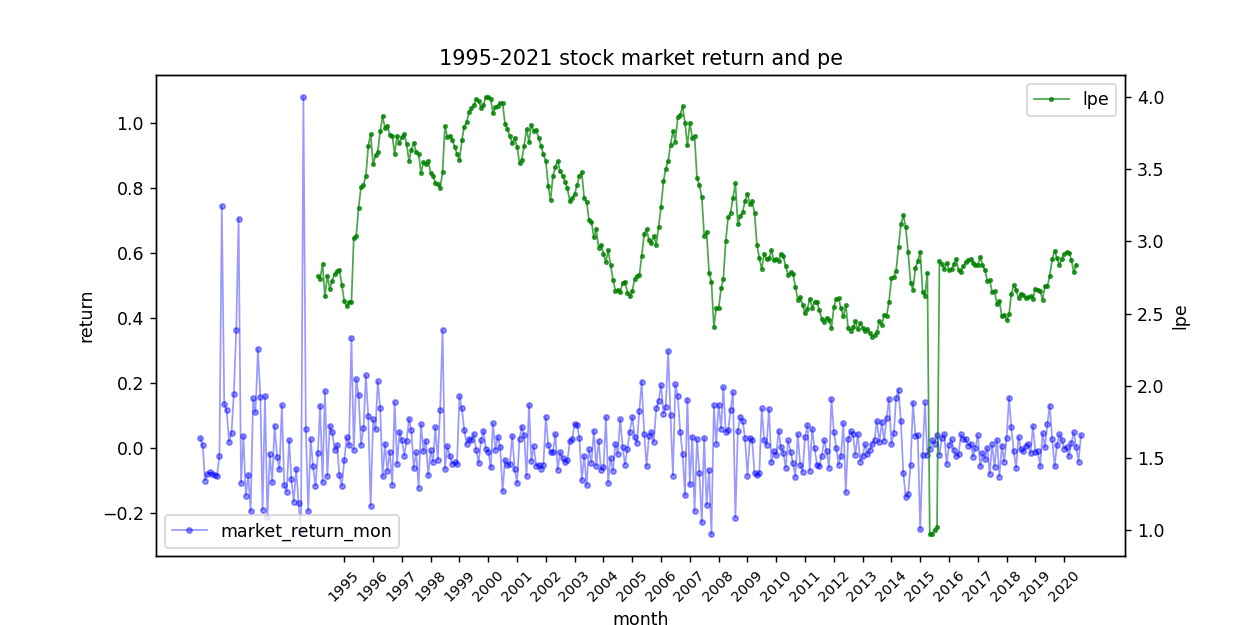

Text(0.5, 0, 'month')

Text(0, 0.5, 'return')

Text(0.5, 1.0, '1995-2021 stock market return and pe')

Text(0, 0.5, 'lpe')

In [71]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(market_return_mon['Return'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='market_return_mon')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('return')  # 设置左边纵坐标标签
ax1.legend(loc=3)  # 设置图例在左下方
ax1.set_title('1995-2021 stock market return and pe')  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(time_series['lpe'],
         color='green',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='lpe')
ax2.set_ylabel('lpe')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方



year_freq = pd.date_range(start='1995', end='2021', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=45, fontsize='small')

fig = plt.gcf()
fig.savefig('rp2.png', bbox_inches='tight')

In [ ]:
#股市收益率与pe的OLS 回归

In [72]:
model2 = smf.ols('Return ~ lpe',
                 data=time_series).fit(cov_type='HAC', cov_kwds={'maxlags': 6})
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                     1.157
Date:                Wed, 06 Oct 2021   Prob (F-statistic):              0.283
Time:                        18:40:13   Log-Likelihood:                 333.20
No. Observations:                 317   AIC:                            -662.4
Df Residuals:                     315   BIC:                            -654.9
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0393      0.024      1.665      0.0

In [83]:
#rt+1 = α + β ∗ pdt中，α=0.0393，β=-0.0087
r2=0.0393-0.0087*2.844537
print("下期股市收益率为",r2)

下期股市收益率为 0.014552528100000003


In [ ]:
##合并股市收益率和pb

In [73]:
# %% Merge Time Series Data
time_series = pd.merge(market_return_mon,pb,on=['year', 'month'])
time_series = time_series.sort_values(axis=0, ascending=True, by=['year','month'])
time_series['mon'] = pd.date_range('1995-01','2021-06', freq='MS')
time_series['return'] = np.log(time_series['Return']+1)
time_series.set_index('mon', inplace=True)
time_series['lpb'] = time_series['pb'].shift(1)
time_series

,year,month,Return,pb,return,lpb
mon,,,,,,
1995-01-01,1995,1,-0.116298,0.821406,-0.123635,NaN
1995-02-01,1995,2,-0.014059,0.801429,-0.014159,0.821406
1995-03-01,1995,3,0.130882,0.912102,0.122998,0.801429
1995-04-01,1995,4,-0.104304,0.761376,-0.110154,0.912102
1995-05-01,1995,5,0.175455,0.772707,0.161655,0.761376
...,...,...,...,...,...,...
2021-02-01,2021,2,0.003571,0.542445,0.003565,0.534937
2021-03-01,2021,3,-0.024019,0.519381,-0.024312,0.542445
2021-04-01,2021,4,0.014812,0.513151,0.014703,0.519381


<IPython.core.display.Javascript object>


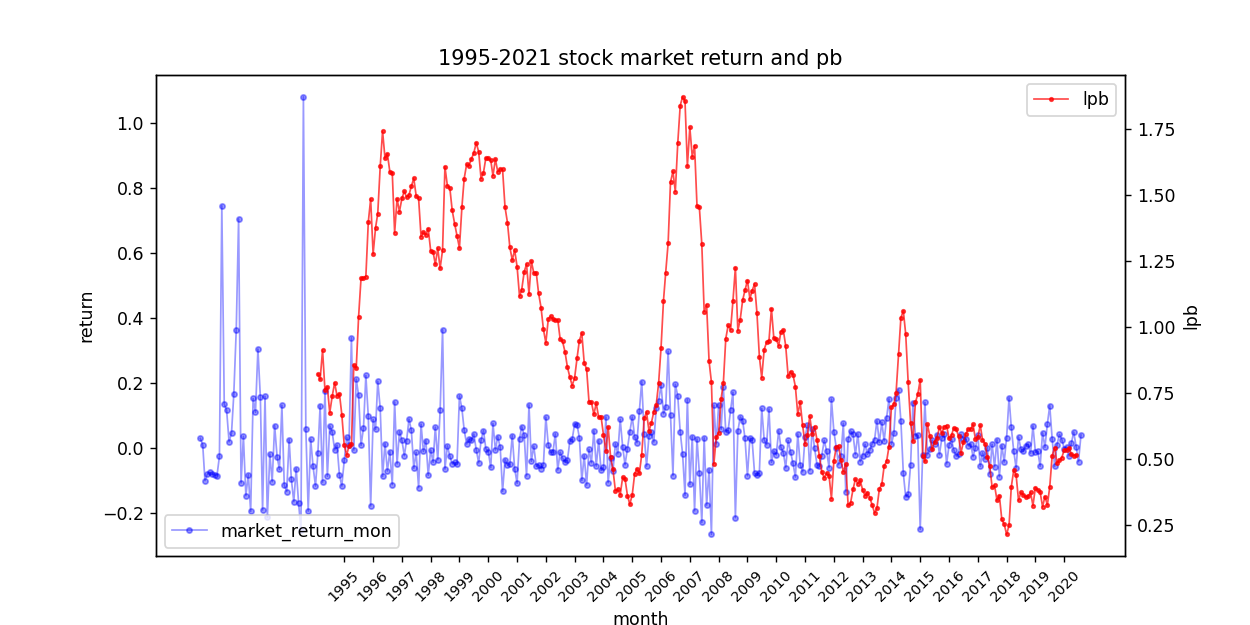

Text(0.5, 0, 'month')

Text(0, 0.5, 'return')

Text(0.5, 1.0, '1995-2021 stock market return and pb')

Text(0, 0.5, 'lpb')

In [75]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(market_return_mon['Return'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='market_return_mon')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('return')  # 设置左边纵坐标标签
ax1.legend(loc=3)  # 设置图例在左下方
ax1.set_title('1995-2021 stock market return and pb')  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(time_series['lpb'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='lpb')
ax2.set_ylabel('lpb')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方



year_freq = pd.date_range(start='1995', end='2021', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=45, fontsize='small')

fig = plt.gcf()
fig.savefig('rp3.png', bbox_inches='tight')

In [ ]:
#股市收益率与pb的OLS 回归

In [76]:
model3 = smf.ols('Return ~ lpb',
                 data=time_series).fit(cov_type='HAC', cov_kwds={'maxlags': 6})
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.239
Date:                Wed, 06 Oct 2021   Prob (F-statistic):              0.266
Time:                        18:42:20   Log-Likelihood:                 333.39
No. Observations:                 317   AIC:                            -662.8
Df Residuals:                     315   BIC:                            -655.3
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0239      0.010      2.457      0.0

In [84]:
#rt+1 = α + β ∗ pdt中，α=0.0239，β=-0.0127
r3=0.0239-0.0127*0.521658
print("下期股市收益率为",r3)

下期股市收益率为 0.017274943400000003
